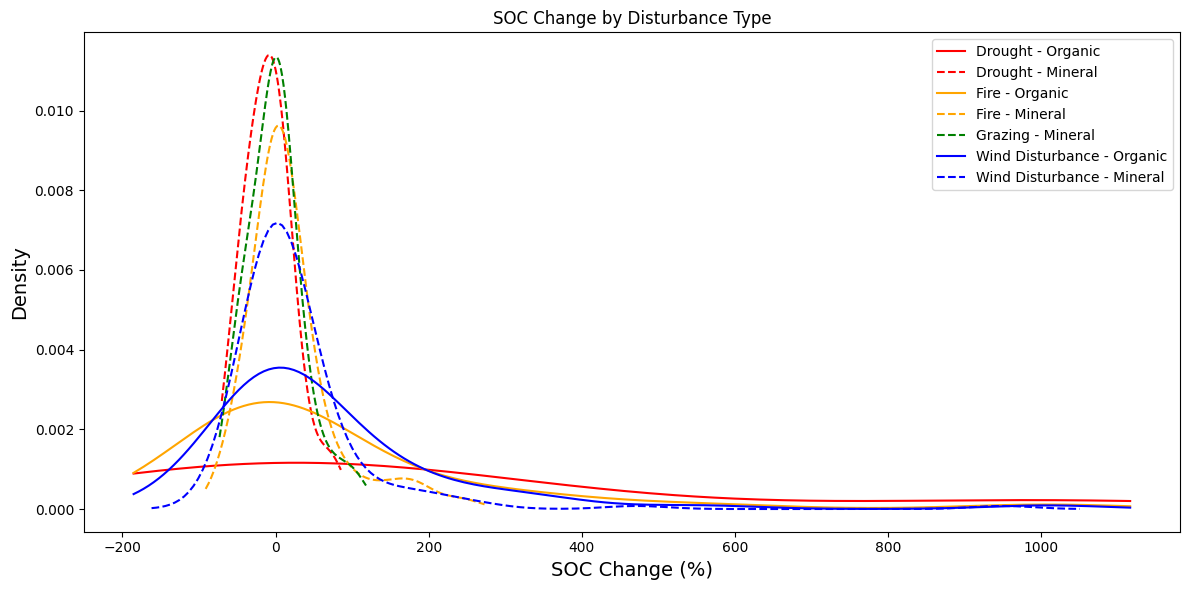

In [11]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from itertools import cycle

# File paths
file_paths = {
    'Drought': '/Users/yanlei/Documents/PhD/postdoc_3B/scripts/SOC_byPlot_byYear_drought.csv',
    'Fire': '/Users/yanlei/Documents/PhD/postdoc_3B/scripts/SOC_byPlot_byYear_Fire.csv',
    'Grazing': '/Users/yanlei/Documents/PhD/postdoc_3B/scripts/SOC_byPlot_byYear_Grazing.csv',
    'Wind Disturbance': '/Users/yanlei/Documents/PhD/postdoc_3B/scripts/SOC_byPlot_byYear_NatualDisturbance.csv'
}

# Define a set of distinguishable colors ranging from red to blue
colors = cycle(['red', 'orange', 'green', 'blue'])
color_map = {key: next(colors) for key in file_paths}

# Function to compute KDE
def compute_kde(data, column):
    data_clean = data[np.isfinite(data[column])]
    x = data_clean[column].values
    kde = gaussian_kde(x)
    xmin, xmax = x.min(), x.max()
    margin = (xmax - xmin) * 0.1
    grid = np.linspace(xmin - margin, xmax + margin, 200)
    density = kde(grid)
    return grid, density

# Create the KDE plot
plt.figure(figsize=(12, 6))

for disturbance_type, path in file_paths.items():
    df = pd.read_csv(path)

    # Calculate percentage change
    df['change_O'] = ((df['mean_after_O'] - df['mean_before_O']) / df['mean_before_O']) * 100
    df['change_M'] = ((df['mean_after_M'] - df['mean_before_M']) / df['mean_before_M']) * 100

    # Keep rows with at least one valid change
    df_clean = df.dropna(subset=['change_O', 'change_M'], how='all')
    color = color_map[disturbance_type]

    # Plot Organic layer if valid
    if df_clean['change_O'].dropna().shape[0] > 1:
        grid_O, dens_O = compute_kde(df_clean, 'change_O')
        plt.plot(grid_O, dens_O, label=f'{disturbance_type} - Organic', color=color, linestyle='-')

    # Plot Mineral layer if valid
    if df_clean['change_M'].dropna().shape[0] > 1:
        grid_M, dens_M = compute_kde(df_clean, 'change_M')
        plt.plot(grid_M, dens_M, label=f'{disturbance_type} - Mineral', color=color, linestyle='--')

# Finalize the plot
plt.title('SOC Change by Disturbance Type')
plt.xlabel('SOC Change (%)', fontsize = 14)
plt.ylabel('Density', fontsize = 14)
plt.legend()
plt.tight_layout()
plt.show()


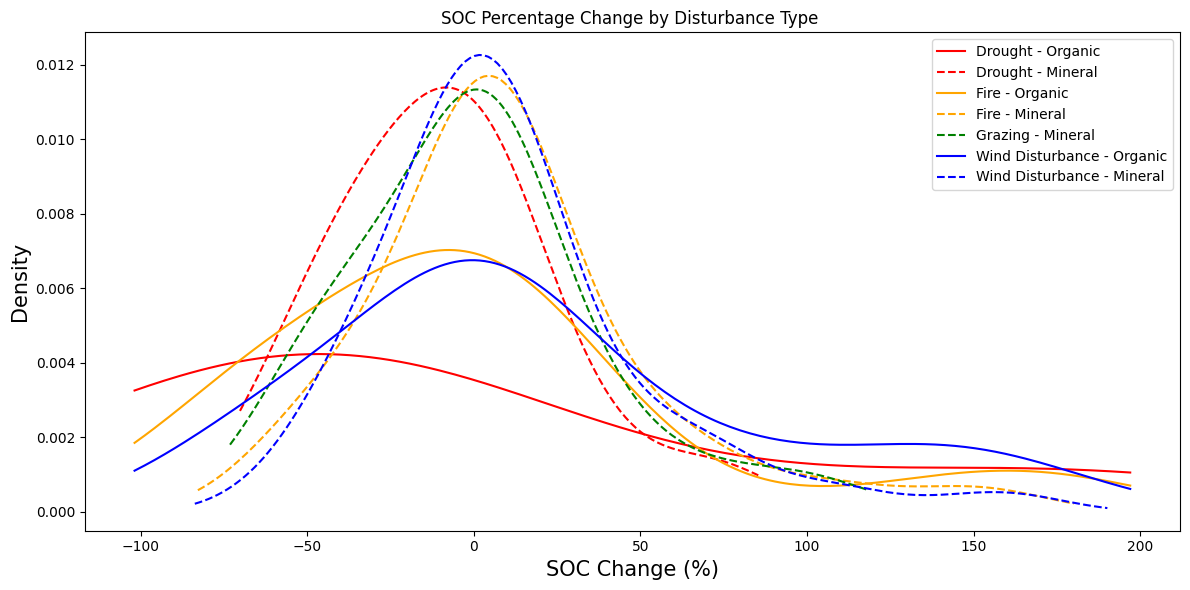

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from itertools import cycle

# Define distinguishable colors
colors = cycle(['red', 'orange', 'green', 'blue'])
color_map = {key: next(colors) for key in file_paths}

# Function to compute KDE
def compute_kde(data, column):
    data_clean = data[np.isfinite(data[column])]
    x = data_clean[column].values
    kde = gaussian_kde(x)
    xmin, xmax = x.min(), x.max()
    margin = (xmax - xmin) * 0.1
    grid = np.linspace(xmin - margin, xmax + margin, 200)
    density = kde(grid)
    return grid, density

# Create the KDE plot
plt.figure(figsize=(12, 6))

for disturbance_type, path in file_paths.items():
    df = pd.read_csv(path)

    # Calculate percent change
    df['change_O'] = ((df['mean_after_O'] - df['mean_before_O']) / df['mean_before_O']) * 100
    df['change_M'] = ((df['mean_after_M'] - df['mean_before_M']) / df['mean_before_M']) * 100

    # Remove extreme values beyond ±200%
    df = df[
        ((df['change_O'].abs() <= 200) | df['change_O'].isna()) &
        ((df['change_M'].abs() <= 200) | df['change_M'].isna())
    ]

    df_clean = df.dropna(subset=['change_O', 'change_M'], how='all')
    color = color_map[disturbance_type]

    # Plot Organic layer if valid
    if df_clean['change_O'].dropna().shape[0] > 1:
        grid_O, dens_O = compute_kde(df_clean, 'change_O')
        plt.plot(grid_O, dens_O, label=f'{disturbance_type} - Organic', color=color, linestyle='-')

    # Plot Mineral layer if valid
    if df_clean['change_M'].dropna().shape[0] > 1:
        grid_M, dens_M = compute_kde(df_clean, 'change_M')
        plt.plot(grid_M, dens_M, label=f'{disturbance_type} - Mineral', color=color, linestyle='--')

# Finalize plot
plt.title('SOC Percentage Change by Disturbance Type ')
plt.xlabel('SOC Change (%)', fontsize = 15)
plt.ylabel('Density', fontsize = 15)
plt.legend()
plt.tight_layout()
plt.show()
